In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier,BaggingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf


In [36]:
data_train = pd.read_csv("../../Data/Daily_Climate_time_series_data/DailyDelhiClimateTrain.csv")
data_test = pd.read_csv("../../Data/Daily_Climate_time_series_data/DailyDelhiClimateTest.csv")
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [38]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [39]:
data_train['date'] = pd.to_datetime(data_train['date'], 
 format = '%Y-%m-%dT', 
 errors = 'coerce')
data_train.date

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: date, Length: 1462, dtype: datetime64[ns]

In [40]:
data_train.index = data_train.date
data_train

,date,meantemp,humidity,wind_speed,meanpressure
date,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
2016-12-28,2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,2016-12-30,14.095238,89.666667,6.266667,1017.904762


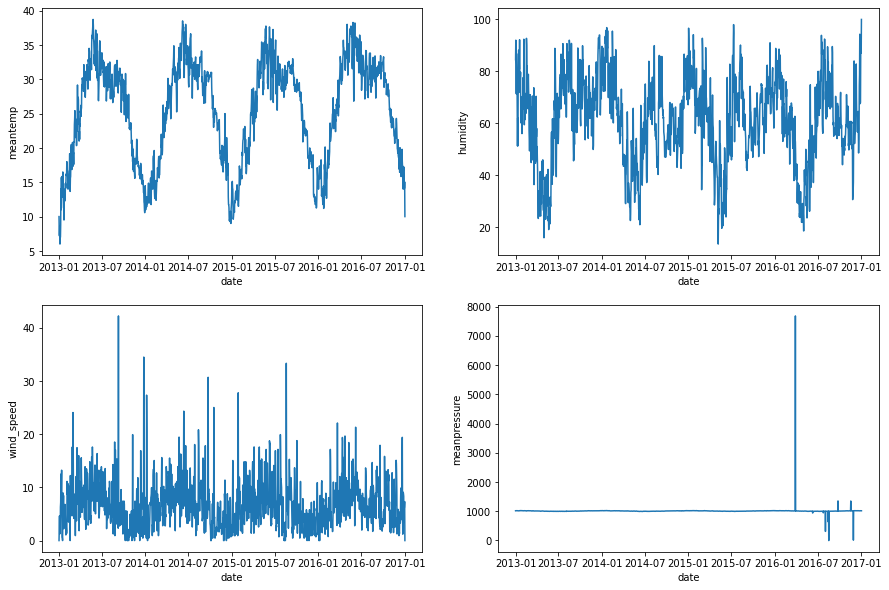

In [41]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
ys = data_train.columns[1:]
for y , ax in zip(ys,axs.ravel()):
    sns.lineplot(x="date",y=y,data=data_train,ax=ax)

In [49]:
month_data = data_train.resample('M').mean()
month_data
year_data = data_train.resample('Y').mean()
year_data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-12-31,24.791494,63.046292,6.827253,1007.642172
2014-12-31,25.010673,59.767942,6.756148,1008.347166
2015-12-31,25.114591,61.430490,6.480603,1008.834821
2016-12-31,27.103373,58.740174,7.162480,1019.557460
2017-12-31,10.000000,100.000000,0.000000,1016.000000


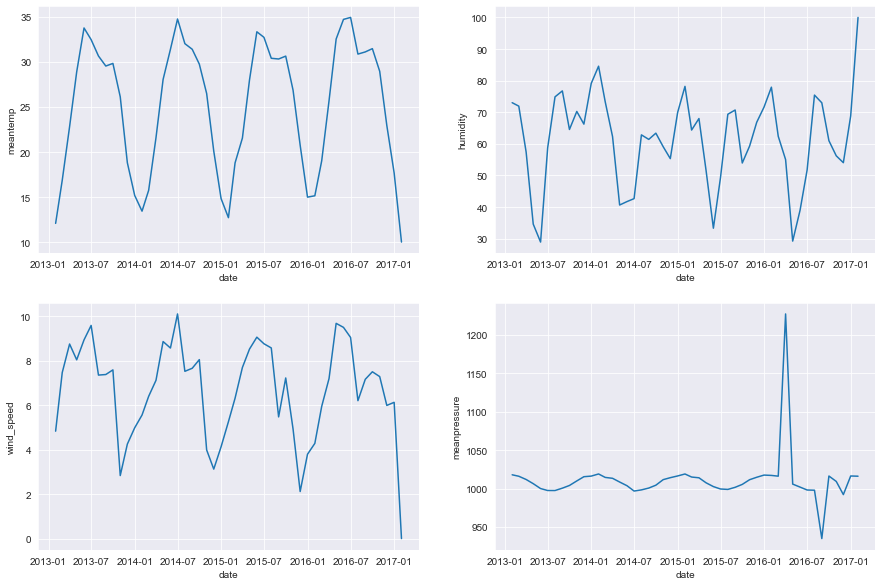

In [55]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
ys = month_data.columns
sns.set_style('darkgrid')
for y , ax in zip(ys,axs.ravel()):
    sns.lineplot(x="date",y=y,data=month_data,ax=ax)
    

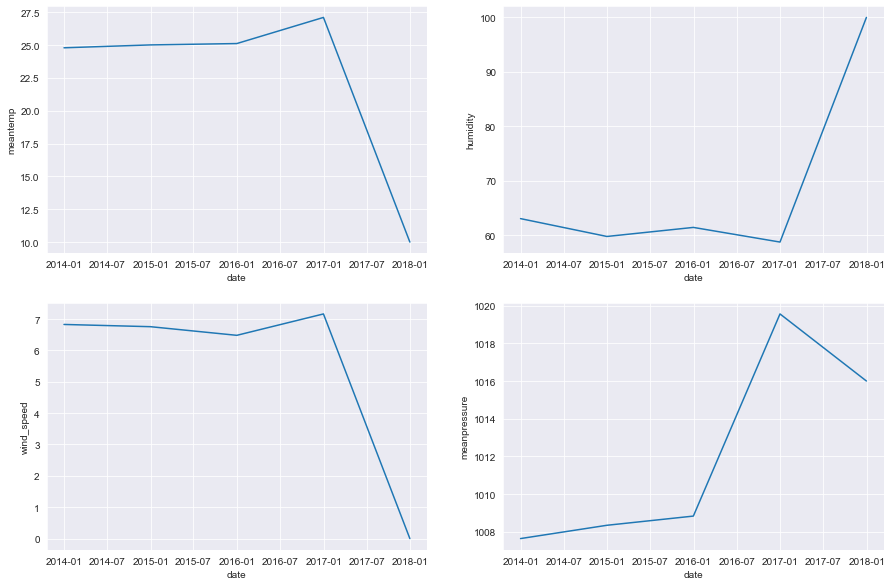

In [56]:
fig,axs = plt.subplots(2,2,figsize=(15,10))
ys = year_data.columns
sns.set_style('darkgrid')
for y , ax in zip(ys,axs.ravel()):
    sns.lineplot(x="date",y=y,data=year_data,ax=ax)

In [93]:
temp_train = data_train.iloc[:,1:2]
temp_test = data_test.iloc[:,1:2]
ss= MinMaxScaler(feature_range=(0,1))
temp_train= ss.fit_transform(temp_train)
temp_test= ss.fit_transform(temp_test)
temp_train

array([[0.12227074],
       [0.04279476],
       [0.0356623 ],
       ...,
       [0.24745269],
       [0.276718  ],
       [0.12227074]])

In [122]:
#monthly data
month_train = month_data.iloc[:,1:2]
month_test = month_data.iloc[:,1:2]
ss= MinMaxScaler(feature_range=(0,1))
month_train= ss.fit_transform(month_train)
month_test= ss.fit_transform(month_test)
month_train

array([[0.62045407],
       [0.60511194],
       [0.40076403],
       [0.079844  ],
       [0.        ],
       [0.41963343],
       [0.64641157],
       [0.67291975],
       [0.50117663],
       [0.58142893],
       [0.525004  ],
       [0.70637381],
       [0.78290122],
       [0.62477841],
       [0.46980947],
       [0.16491979],
       [0.18018501],
       [0.19330724],
       [0.47716413],
       [0.45706745],
       [0.48475396],
       [0.42436913],
       [0.3714387 ],
       [0.57710241],
       [0.69307703],
       [0.49870238],
       [0.54990629],
       [0.31935456],
       [0.06166507],
       [0.28684594],
       [0.56905301],
       [0.58783292],
       [0.35195364],
       [0.42745216],
       [0.53315251],
       [0.60099933],
       [0.68946574],
       [0.47067298],
       [0.36727318],
       [0.00430492],
       [0.14101083],
       [0.32115012],
       [0.65424211],
       [0.61995511],
       [0.45133791],
       [0.38389667],
       [0.35339829],
       [0.561

In [96]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:i+look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [144]:
month_train_x,month_train_y = create_dataset(month_train)
month_test_x, month_test_y = create_dataset(month_test)
month_train_x = np.reshape(month_train_x, (month_train_x.shape[0], month_train_x.shape[1],1))
month_test_x = np.reshape(month_test_x, (month_test_x.shape[0], month_test_x.shape[1],1))
month_train_x.shape

(47, 1, 1)

In [137]:
train_x,train_y = create_dataset(temp_train)
test_x, test_y = create_dataset(temp_test)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1],1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1],1))
train_x

array([[[0.12227074]],

       [[0.04279476]],

       [[0.0356623 ]],

       ...,

       [[0.34288969]],

       [[0.28238719]],

       [[0.24745269]]])

In [146]:
#Deep Learning
model = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(100,input_shape=(1,1),return_sequences = True),
     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 100, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 100, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(units=1)
    ])
model.compile(optimizer='adam',
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['accuracy',tf.keras.metrics.mean_squared_error])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 1, 100)            40800     
_________________________________________________________________
dropout_52 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
dropout_53 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
dropout_54 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 50)              

In [129]:
model.fit(train_x, train_y, epochs = 100, batch_size = 32)

Epoch 1/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2018 - accuracy: 6.8493e-04 - mean_squared_error: 0.2018
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.0014 - mean_squared_error: 0.0245
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.0014 - mean_squared_error: 0.0140
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.0014 - mean_squared_error: 0.0090
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.0014 - mean_squared_error: 0.0087
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.0014 - mean_squared_error: 0.0076
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.0014 - mean_squared_error: 0.0076
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.0014 -

46/46 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 0.0014 - mean_squared_error: 0.0039
Epoch 65/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 0.0014 - mean_squared_error: 0.0040
Epoch 66/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 0.0014 - mean_squared_error: 0.0041
Epoch 67/100
46/46 [==============================] - 0s 6ms/step - loss: 0.0039 - accuracy: 0.0014 - mean_squared_error: 0.0039
Epoch 68/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 0.0014 - mean_squared_error: 0.0040
Epoch 69/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 0.0014 - mean_squared_error: 0.0039
Epoch 70/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 0.0014 - mean_squared_error: 0.0040
Epoch 71/100
46/46 [==============================] - 0s 5ms/step - loss: 0.0038 - accuracy: 0.0014 - mean_squ

In [147]:
model.fit(month_train_x,month_train_y, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.0213 - mean_squared_error: 0.2327
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.0213 - mean_squared_error: 0.2262
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.2190 - accuracy: 0.0213 - mean_squared_error: 0.2190
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.0213 - mean_squared_error: 0.2116
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2036 - accuracy: 0.0213 - mean_squared_error: 0.2036
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.1942 - accuracy: 0.0213 - mean_squared_error: 0.1942
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.0213 - mean_squared_error: 0.1847
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.1745 - accuracy: 0.0213 - mean_squared_error:

2/2 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.0213 - mean_squared_error: 0.0263
Epoch 66/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0284 - accuracy: 0.0213 - mean_squared_error: 0.0284
Epoch 67/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.0213 - mean_squared_error: 0.0282
Epoch 68/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.0213 - mean_squared_error: 0.0286
Epoch 69/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.0213 - mean_squared_error: 0.0315
Epoch 70/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0311 - accuracy: 0.0213 - mean_squared_error: 0.0311
Epoch 71/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.0213 - mean_squared_error: 0.0304
Epoch 72/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.0213 - mean_squared_error: 0.02

In [120]:
prediction = model.predict(test_x)
prediction = ss.inverse_transform(prediction)
temp_test = ss.inverse_transform(temp_test)

In [126]:
#monthly
prediction_month = model.predict(month_test_x)
prediction_month = ss.inverse_transform(prediction_month)
month_test = ss.inverse_transform(month_test)

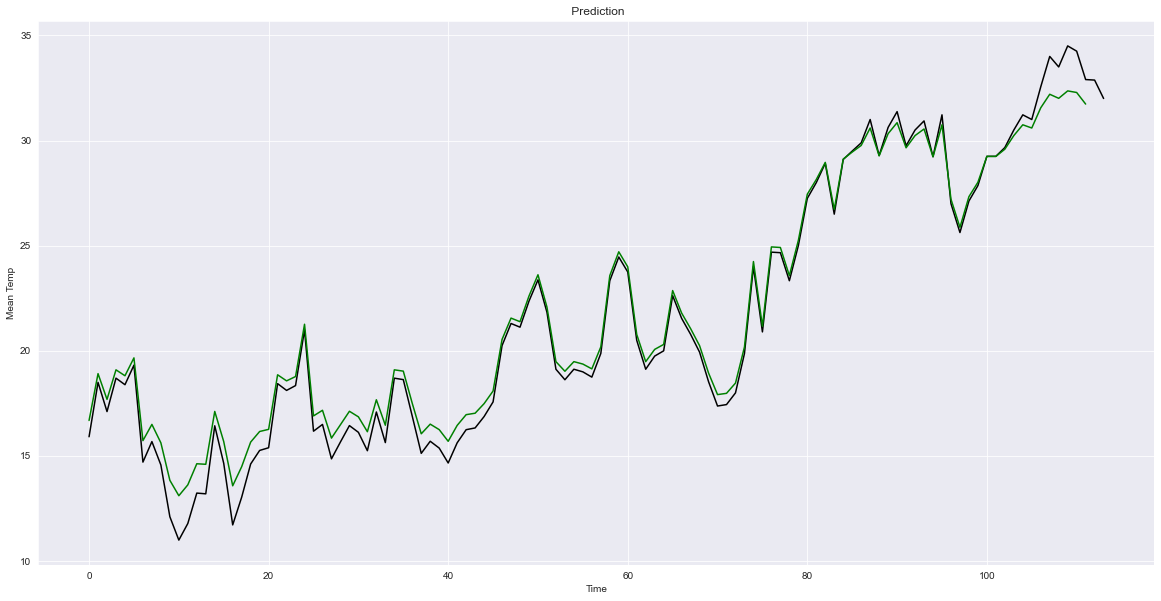

In [121]:
plt.figure(figsize=(20,10))
plt.plot(temp_test, color = 'black', label = 'Delhi Mean Temperature')
plt.plot(prediction, color = 'green', label = 'Predicted Delhi Mean Temperature')
plt.title(' Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Temp')
plt.show()

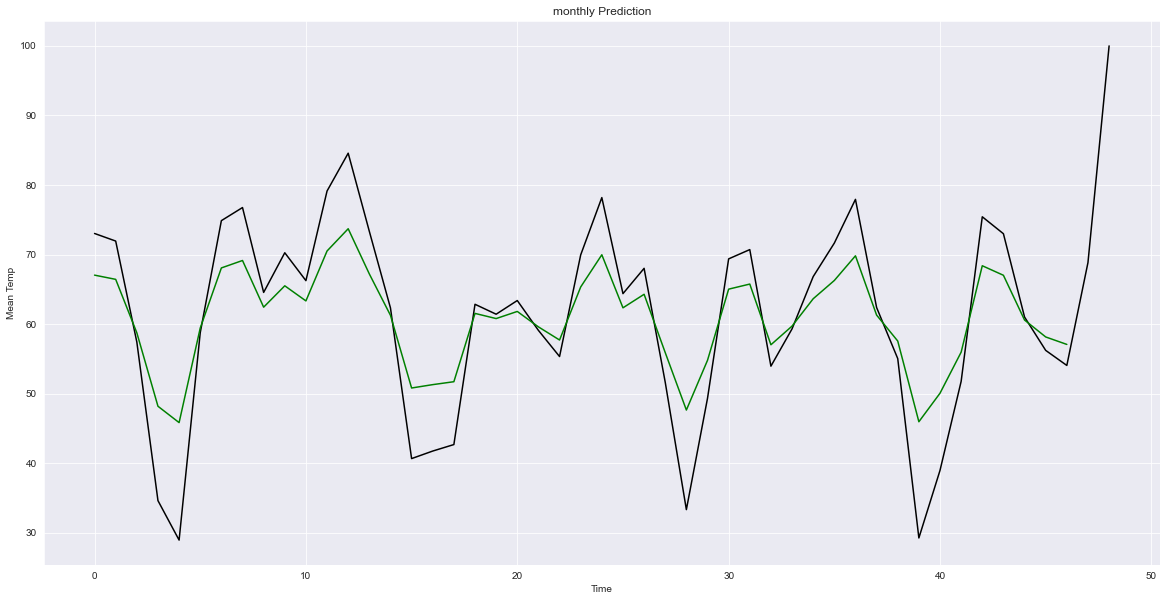

In [131]:
#monthly
plt.figure(figsize=(20,10))
plt.plot(month_test, color = 'black', label = 'Delhi monthly Mean Temperature')
plt.plot(prediction_month, color = 'green', label = 'Predicted monthly Delhi Mean Temperature')
plt.title('monthly Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Temp')
plt.show()